<a href="https://colab.research.google.com/github/PGFDEE/Assignment1/blob/main/HomeWork2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Environment ready.

Shapes: (442, 10) (442,)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641



=== Descriptive stats ===


,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612



=== Target summary ===


,target
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000



Missing values check:
Missing in X:
 age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64
Missing in y:
 0


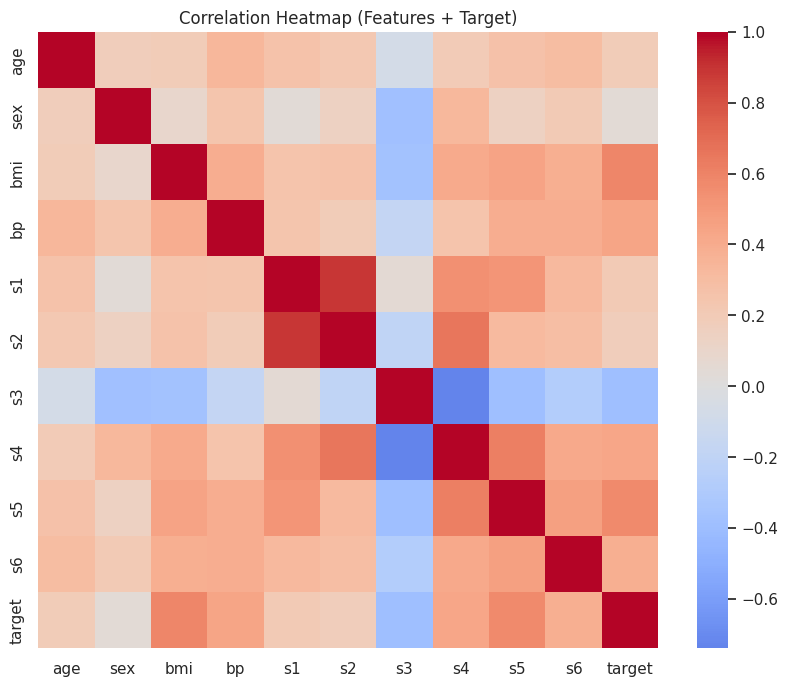


=== Correlation with target ===


,target
bmi,0.586450
s5,0.565883
bp,0.441482
s4,0.430453
s6,0.382483
s1,0.212022
age,0.187889
s2,0.174054
sex,0.043062
s3,-0.394789


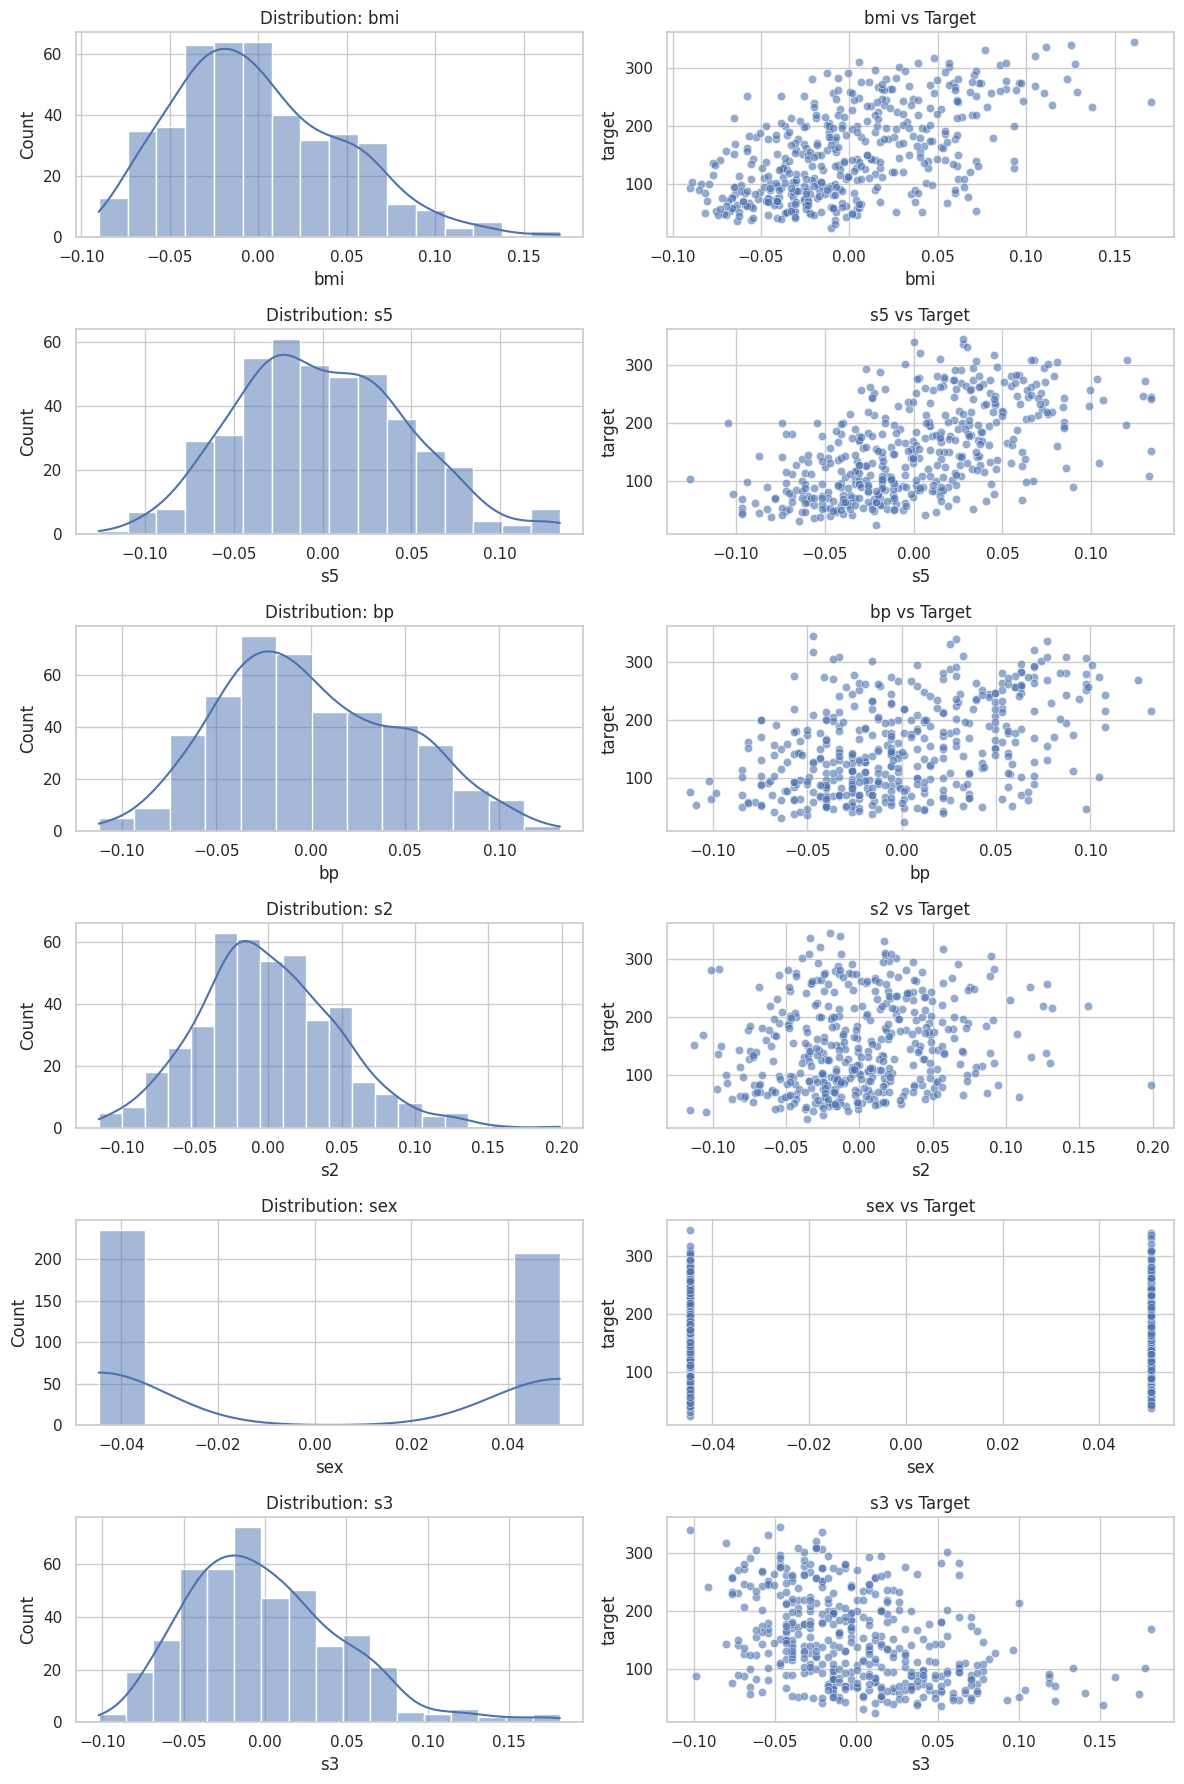


Test shapes: (353, 10) (89, 10)

=== OLS Metrics ===


,OLS (Train)
RMSE,53.558843
MAE,43.483504
R^2,0.527919


,OLS (Test)
RMSE,53.853446
MAE,42.794095
R^2,0.452603


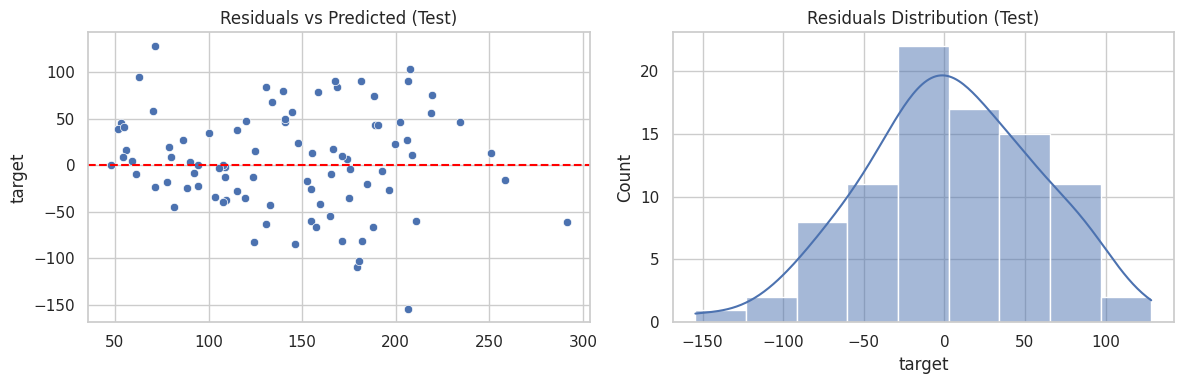

OLS CV R^2: [0.4526 0.5732 0.3914 0.5843 0.3908] Mean: 0.4785

=== Best Hyperparameters & CV Scores ===
Ridge best: {'ridge__alpha': np.float64(1.0)} CV R^2: 0.4808
Lasso best: {'lasso__alpha': np.float64(0.1)} CV R^2: 0.4812

=== Model Comparison (Train/Test) ===


,OLS (Train),OLS (Test)
RMSE,53.558843,53.853446
MAE,43.483504,42.794095
R^2,0.527919,0.452603


,Ridge (Train),Ridge (Test)
RMSE,53.575145,53.777454
MAE,43.494722,42.811999
R^2,0.527632,0.454147


,Lasso (Train),Lasso (Test)
RMSE,53.598422,53.708698
MAE,43.515660,42.805234
R^2,0.527221,0.455541


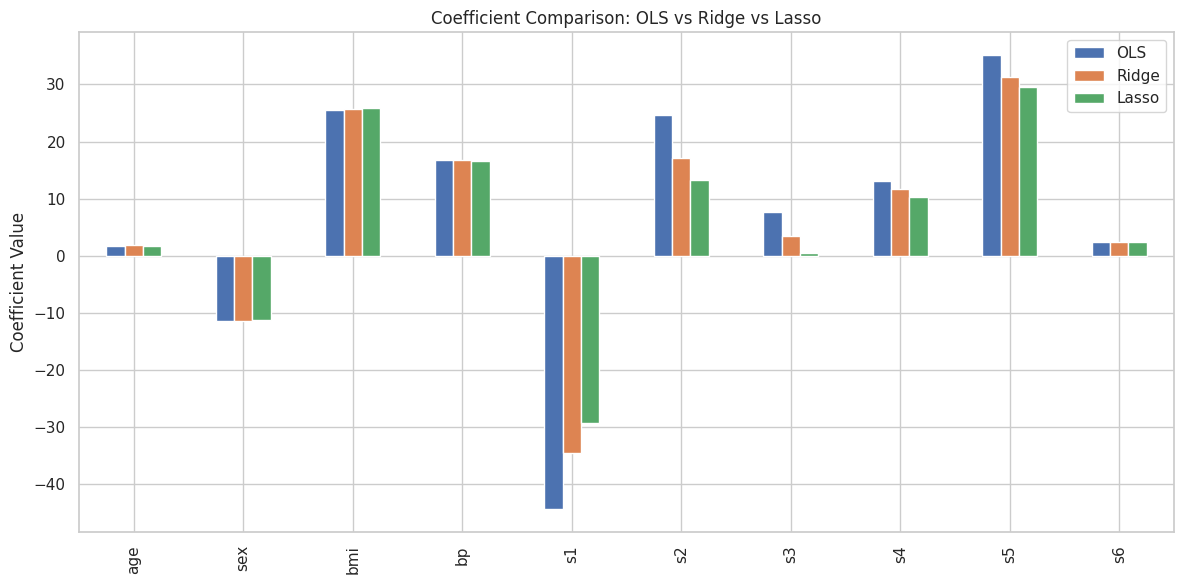


=== Coefficients table ===


,OLS,Ridge,Lasso
age,1.753758,1.807342,1.730451
sex,-11.511809,-11.448190,-11.316359
bmi,25.607121,25.732699,25.824627
bp,16.828872,16.734300,16.644252
s1,-44.448856,-34.671954,-29.358412
s2,24.640954,17.053075,13.275844
s3,7.676978,3.369914,0.547948
s4,13.138784,11.764260,10.236168
s5,35.161195,31.378384,29.632826
s6,2.351364,2.458139,2.393475


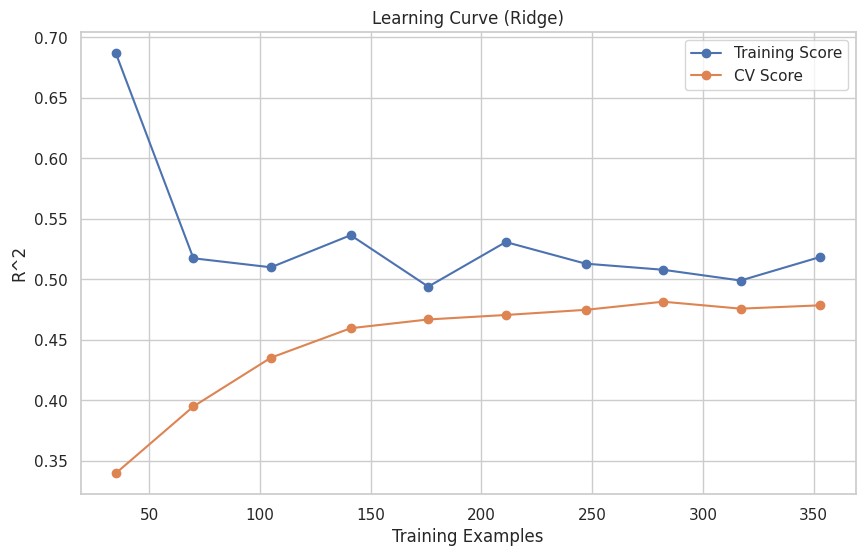


=== Summary (Test Metrics) ===


,OLS_Test,Ridge_Test,Lasso_Test
RMSE,53.853446,53.777454,53.708698
MAE,42.794095,42.811999,42.805234
R^2,0.452603,0.454147,0.455541



Selected final model: Lasso
Model saved to: /content/diabetes_lasso_model.joblib


In [4]:
# ============================================================
# Setup
# ============================================================

!pip install -q numpy pandas matplotlib seaborn scikit-learn joblib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from joblib import dump

sns.set(style="whitegrid", context="notebook")
np.random.seed(42)

print("Environment ready.\n")

# ============================================================
# Load Dataset
# ============================================================

diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="target")

print("Shapes:", X.shape, y.shape)
display(X.head())

print("\n=== Descriptive stats ===")
display(X.describe().T)

print("\n=== Target summary ===")
display(y.describe())

print("\nMissing values check:")
print("Missing in X:\n", X.isna().sum())
print("Missing in y:\n", y.isna().sum())

plt.figure(figsize=(10, 8))
sns.heatmap(pd.concat([X, y], axis=1).corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Features + Target)")
plt.show()

# ============================================================
# Correlation with Target
# ============================================================

corr_with_y = pd.concat([X, y], axis=1).corr()['target'].drop('target').sort_values(ascending=False)
print("\n=== Correlation with target ===")
display(corr_with_y)

top_pos = list(corr_with_y.head(3).index)
top_neg = list(corr_with_y.tail(3).index)
top_features = top_pos + top_neg

fig, axes = plt.subplots(nrows=len(top_features), ncols=2, figsize=(12, len(top_features)*3))
for i, feat in enumerate(top_features):
    sns.histplot(X[feat], kde=True, ax=axes[i,0])
    axes[i,0].set_title(f"Distribution: {feat}")

    sns.scatterplot(x=X[feat], y=y, ax=axes[i,1], alpha=0.6)
    axes[i,1].set_title(f"{feat} vs Target")

plt.tight_layout()
plt.show()

# ============================================================
# Train/Test Split
# ============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("\nTest shapes:", X_train.shape, X_test.shape)

# ============================================================
# Metrics Function (Fixed RMSE)
# ============================================================

def metrics_report(y_true, y_pred, label="Model"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)  # manual RMSE (compatible with all sklearn versions)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return pd.Series({"RMSE": rmse, "MAE": mae, "R^2": r2}, name=label)

def evaluate_model(model, X_train, y_train, X_test, y_test, name):
    yhat_train = model.predict(X_train)
    yhat_test = model.predict(X_test)

    return pd.concat([
        metrics_report(y_train, yhat_train, label=f"{name} (Train)"),
        metrics_report(y_test, yhat_test, label=f"{name} (Test)")
    ], axis=1)

# ============================================================
# Baseline OLS Model
# ============================================================

ols_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])

ols_pipe.fit(X_train, y_train)

y_pred_train = ols_pipe.predict(X_train)
y_pred_test = ols_pipe.predict(X_test)

print("\n=== OLS Metrics ===")
display(metrics_report(y_train, y_pred_train, label="OLS (Train)"))
display(metrics_report(y_test, y_pred_test, label="OLS (Test)"))

# Residuals
residuals = y_test - y_pred_test

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(x=y_pred_test, y=residuals, ax=axes[0])
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title("Residuals vs Predicted (Test)")

sns.histplot(residuals, kde=True, ax=axes[1])
axes[1].set_title("Residuals Distribution (Test)")

plt.tight_layout()
plt.show()

# Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_ols = cross_val_score(ols_pipe, X, y, scoring="r2", cv=cv)

print("OLS CV R^2:", np.round(cv_scores_ols, 4), "Mean:", np.round(np.mean(cv_scores_ols), 4))

# ============================================================
# Ridge & Lasso with GridSearchCV
# ============================================================

ridge_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge(random_state=42))
])

lasso_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(random_state=42, max_iter=10000))
])

ridge_grid = {"ridge__alpha": np.logspace(-3, 3, 13)}
lasso_grid = {"lasso__alpha": np.logspace(-3, 1, 9)}

ridge_search = GridSearchCV(ridge_pipe, ridge_grid, scoring="r2", cv=cv, n_jobs=-1)
lasso_search = GridSearchCV(lasso_pipe, lasso_grid, scoring="r2", cv=cv, n_jobs=-1)

ridge_search.fit(X_train, y_train)
lasso_search.fit(X_train, y_train)

ridge_best = ridge_search.best_estimator_
lasso_best = lasso_search.best_estimator_

print("\n=== Best Hyperparameters & CV Scores ===")
print("Ridge best:", ridge_search.best_params_, "CV R^2:", np.round(ridge_search.best_score_, 4))
print("Lasso best:", lasso_search.best_params_, "CV R^2:", np.round(lasso_search.best_score_, 4))

# Evaluate tuned models
ridge_metrics = evaluate_model(ridge_best, X_train, y_train, X_test, y_test, "Ridge")
lasso_metrics = evaluate_model(lasso_best, X_train, y_train, X_test, y_test, "Lasso")
ols_metrics = evaluate_model(ols_pipe, X_train, y_train, X_test, y_test, "OLS")

print("\n=== Model Comparison (Train/Test) ===")
display(ols_metrics)
display(ridge_metrics)
display(lasso_metrics)

# ============================================================
# Coefficient Comparison
# ============================================================

coefs = pd.DataFrame({
    "OLS": ols_pipe.named_steps["lr"].coef_,
    "Ridge": ridge_best.named_steps["ridge"].coef_,
    "Lasso": lasso_best.named_steps["lasso"].coef_,
}, index=diabetes.feature_names)

coefs.plot(kind="bar", figsize=(12, 6))
plt.title("Coefficient Comparison: OLS vs Ridge vs Lasso")
plt.ylabel("Coefficient Value")
plt.tight_layout()
plt.show()

print("\n=== Coefficients table ===")
display(coefs)

# ============================================================
# Learning Curve (Ridge Best)
# ============================================================

train_sizes, train_scores, test_scores = learning_curve(
    ridge_best, X, y, cv=cv, scoring="r2",
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', label="CV Score")
plt.title("Learning Curve (Ridge)")
plt.xlabel("Training Examples")
plt.ylabel("R^2")
plt.legend()
plt.grid(True)
plt.show()

# ============================================================
# Final Model Selection & Save
# ============================================================

summary = pd.DataFrame({
    "OLS_Test": ols_metrics["OLS (Test)"],
    "Ridge_Test": ridge_metrics["Ridge (Test)"],
    "Lasso_Test": lasso_metrics["Lasso (Test)"]
})

print("\n=== Summary (Test Metrics) ===")
display(summary)

best_model_name = summary.loc["R^2", :].idxmax().replace("_Test", "")
best_model = {"OLS": ols_pipe, "Ridge": ridge_best, "Lasso": lasso_best}[best_model_name]

print(f"\nSelected final model: {best_model_name}")

model_path = f"/content/diabetes_{best_model_name.lower()}_model.joblib"
dump(best_model, model_path)

print(f"Model saved to: {model_path}")
